In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [ ]:
AQT = "Train_Data_Final.csv"
dataset_df = pd.read_csv(AQT)

print(f"Full train dataset shape: {dataset_df.shape}")
dataset_df.head()

dataset_df = dataset_df.drop('id', axis=1)

dataset_df['combined_datetime'] = dataset_df["Date"] + ' ' + dataset_df["Time"]
dataset_df['date_time'] = pd.to_datetime(dataset_df['combined_datetime'])
dataset_df['year'] = dataset_df['date_time'].dt.year
dataset_df['month'] = dataset_df['date_time'].dt.month
dataset_df['day'] = dataset_df['date_time'].dt.day
dataset_df['hour'] = dataset_df['date_time'].dt.hour
dataset_df['min'] = dataset_df['date_time'].dt.minute
dataset_df['sec'] = dataset_df['date_time'].dt.second

dataset_df = dataset_df.drop({'Date', 'Time', 'combined_datetime', 'date_time'}, axis=1)

dataset_df.head()


Full train dataset shape: (8000, 16)


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type,year,month,day,hour,min,sec
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,0.757754,Ideal,2004,3,10,18,0,0
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,0.725487,Ideal,2004,3,10,19,0,0
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,0.750239,Slightly Elevated,2004,3,10,20,0,0
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,0.786713,Slightly Elevated,2004,3,10,21,0,0
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,0.788794,Slightly Elevated,2004,3,10,22,0,0


count      8000
unique        5
top       Ideal
freq       2673
Name: RH_type, dtype: object


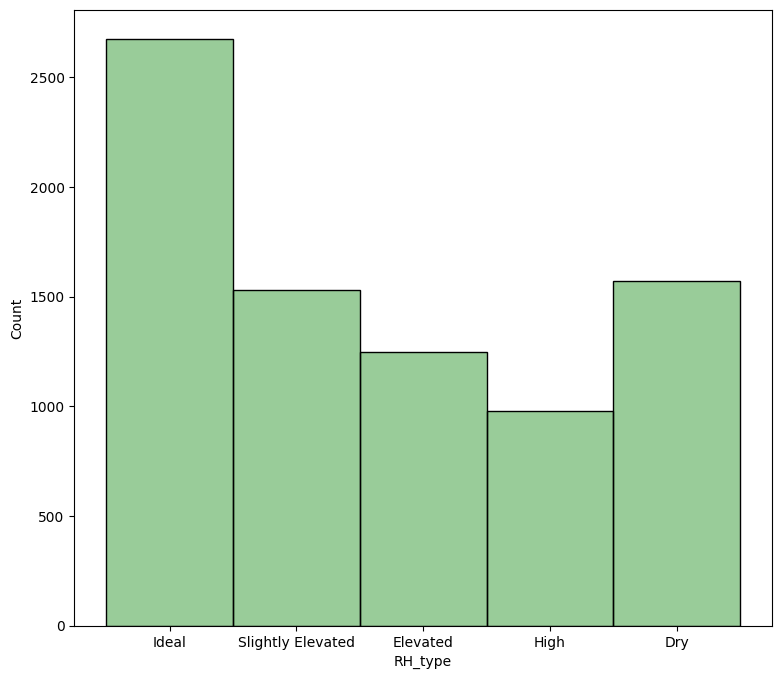

In [ ]:
plt.figure(figsize=(9, 8))
sns.histplot(dataset_df["RH_type"], color="g", bins=100, alpha=0.4)

print(dataset_df['RH_type'].describe())

In [ ]:
train_x_temp = dataset_df.drop('RH_type', axis=1)
train_y_temp = dataset_df['RH_type']

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_y_temp)

x_train_temp, x_val_temp, y_train_temp, y_val_temp = train_test_split(train_x_temp, train_labels_encoded, test_size=0.2, random_state=41)

x_train = tf.convert_to_tensor(x_train_temp)
y_train = tf.convert_to_tensor(y_train_temp)
x_val = tf.convert_to_tensor(x_val_temp)
y_val = tf.convert_to_tensor(y_val_temp)

x_train.shape, y_train.shape, x_val.shape, y_val.shape


(TensorShape([6400, 18]),
 TensorShape([6400]),
 TensorShape([1600, 18]),
 TensorShape([1600]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=5, activation='softmax')
])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [12]:
history = model1.fit(x_train, y_train, epochs=100)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7199 - loss: 0.6317
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6780 - loss: 0.7653
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6882 - loss: 0.6960
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7143 - loss: 0.6468
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.7059 - loss: 0.6667
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - accuracy: 0.7005 - loss: 0.6784
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7059 - loss: 0.6784
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7135 - loss: 0.6523
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7023 - loss: 0.6756
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7031 - loss: 0.7013
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7032 - loss: 0.7260
Epoch 12/100
200/200 ━━━━━━━━━━━━

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, alpha=0.001, solver='adam', random_state=42)
mlp.fit(x_train_temp, y_train_temp)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42)

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train_temp, y_train_temp)

RandomForestClassifier(random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train_temp, y_train_temp)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [13]:
#Model 1 on validation data
validation_loss, validation_accuracy = model1.evaluate(x_val, y_val)
print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

# Model 2 Evaluation (MLPClassifier)
y_pred_mlp = mlp.predict(x_val_temp)
accuracy_mlp = accuracy_score(y_val_temp, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")

# Model 3 Evaluation (Random Forest)
y_pred_rf = random_forest.predict(x_val_temp)
accuracy_rf = accuracy_score(y_val_temp, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Model 4 Evaluation (XGBoost)
y_pred_xgb = xgb_model.predict(x_val_temp)
accuracy_xgb = accuracy_score(y_val_temp, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7753 - loss: 0.5272
Validation Loss: 0.5341856479644775
Validation Accuracy: 0.7662500143051147
MLP Accuracy: 0.51875
Random Forest Accuracy: 0.840625
XGBoost Accuracy: 0.95


In [14]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_val_temp, y_pred_rf)
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")

conf_matrix_xgb = confusion_matrix(y_val_temp, y_pred_xgb)
print(f"XGBoost Confusion Matrix:\n{conf_matrix_xgb}")


Random Forest Confusion Matrix:
[[283   0   0  19   0]
 [  0 176  23   3  53]
 [  0  42 160   0   5]
 [  9   0   0 501  23]
 [  0  33   0  45 225]]
XGBoost Confusion Matrix:
[[293   0   0   9   0]
 [  0 239   3   0  13]
 [  0  10 197   0   0]
 [  8   0   0 508  17]
 [  0  11   0   9 283]]


In [15]:
import joblib
joblib.dump(xgb_model, 'best_model.pkl')

['best_model.pkl']